In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from src.utils import calc_4m

df = pd.read_csv("data/health_study_dataset.csv")

all_columns = ["age", "height", "weight", "systolic_bp", "cholesterol"]

calc_4m(df, all_columns)



,median,mean,min,max
age,50.00,49.43,18.0,90.00
height,171.35,171.85,144.4,200.40
weight,73.20,73.41,33.7,114.40
systolic_bp,149.40,149.18,106.8,185.90
cholesterol,4.97,4.93,2.5,7.88


<Axes: title={'center': 'Histogram över systoliskt blodtryck'}, xlabel='Systolic BP', ylabel='Antal'>

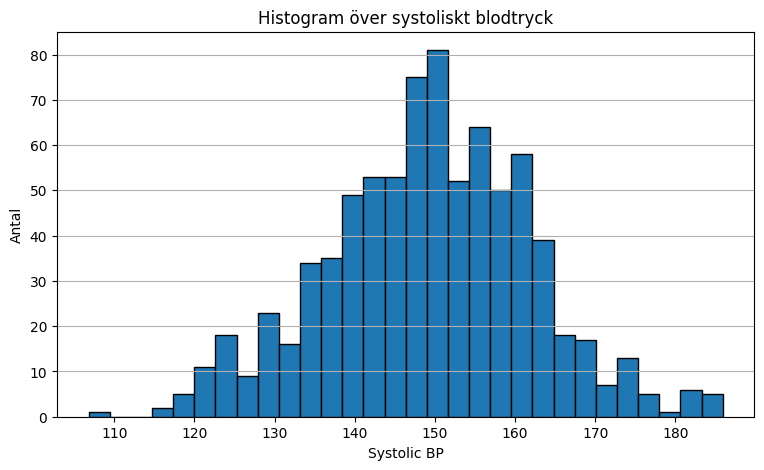

In [2]:
from src import viz as V
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9,5))
V.histogram(ax, df["systolic_bp"], "Histogram över systoliskt blodtryck", "Systolic BP")

<Axes: title={'center': 'Spridning av vikt'}, xlabel='Vikt (kg)'>

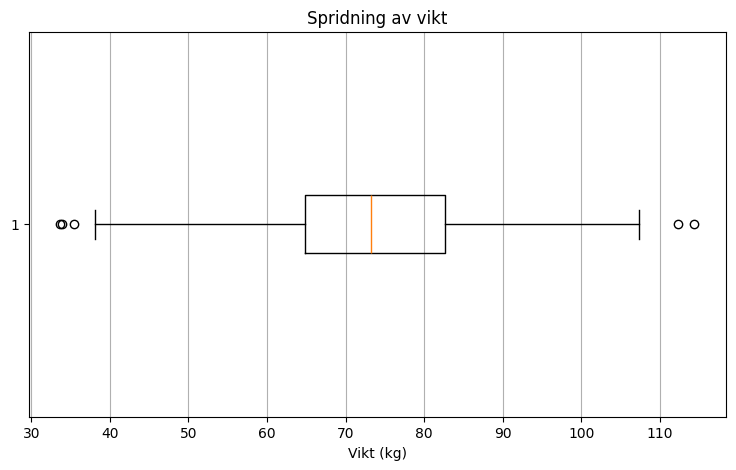

In [3]:
fig, ax = plt.subplots(figsize=(9,5))
V.box_h(ax, df["weight"], "Spridning av vikt", "Vikt (kg)")

Röda vertikala linjen inuti boxen är medianen, vilket motsvarar en vikt på 73.2 kg.
50 % av all data befinner sig inom intervallet: 64.8 - 82.6 kg. (Ett spann på 17.8 kg)
25 % av personerna hade en vikt som var mindre än 64.8 kg
25 % av personerna hade en vikt som var mer än 82.6 kg

lägsta noterade vikten var 33.7 kg
högsta noterade vikten var 114.4 kg



In [4]:
table = df["weight"].describe()
table.round(2)

count    800.00
mean      73.41
std       13.69
min       33.70
25%       64.80
50%       73.20
75%       82.60
max      114.40
Name: weight, dtype: float64

<Axes: title={'center': 'Andel rökare i studien'}, xlabel='Rökare', ylabel='Andel (%)'>

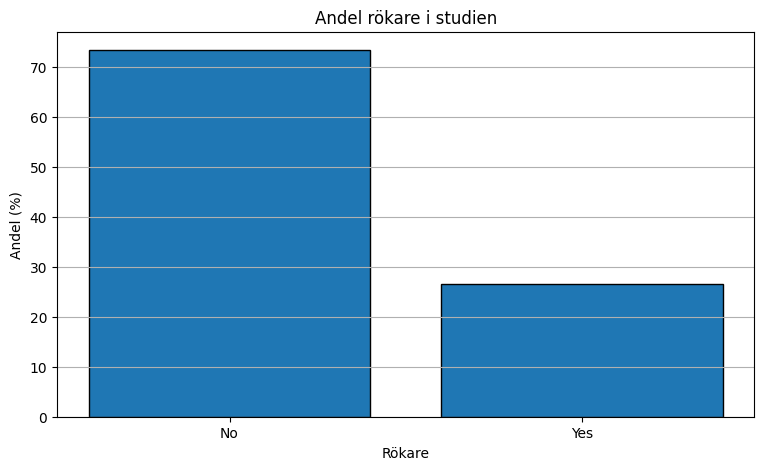

In [16]:
from src.utils import calc_percentage

smoker_percentage = calc_percentage(df, "smoker")

fig, ax = plt.subplots(figsize=(9, 5))
V.bar_chart(ax, smoker_percentage, "Andel rökare i studien", "Rökare", "Andel (%)")


Verkligt resultat: 
 94.12% har inte sjukdom | 5.88% har sjukdom

Resultat av simulation: 
 93.70% har inte sjukdom | 6.30% har sjukdom


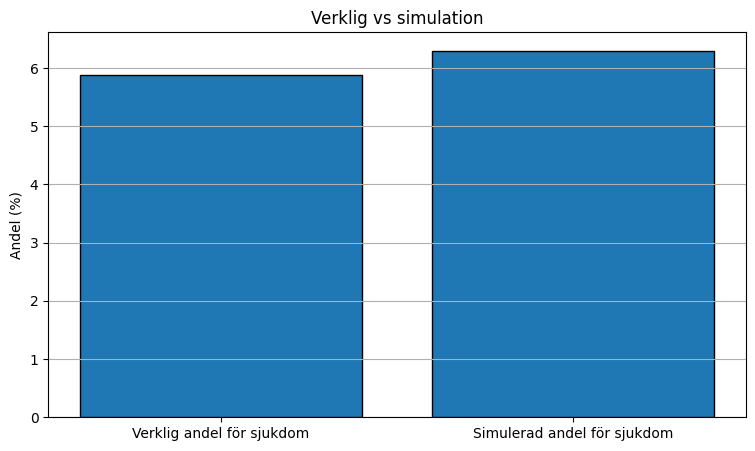

In [60]:
import numpy as np
np.random.seed(42)

disease = calc_percentage(df, "disease")
disease_no, disease_yes = disease
print(f"Verkligt resultat: \n {disease_no:.2f}% har inte sjukdom | {disease_yes:.2f}% har sjukdom")


p_of_disease = disease_yes / 100
simulation = np.random.choice(["yes", "no"], size=1000, p=[p_of_disease, 1 - p_of_disease])


sim_disease_no, sim_disease_yes = pd.Series(simulation).value_counts(normalize=True) * 100
print()
print(f"Resultat av simulation: \n {sim_disease_no:.2f}% har inte sjukdom | {sim_disease_yes:.2f}% har sjukdom")


compare = pd.Series({"Verklig andel för sjukdom": disease_yes, "Simulerad andel för sjukdom": sim_disease_yes})
fig, ax = plt.subplots(figsize=(9, 5))
plt.show(V.bar_chart(ax, compare, "Verklig vs simulation", ""))
